<a href="https://colab.research.google.com/github/ch00226855/CMP414765Fall2022/blob/main/Week10_NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 10
# An Introduction to Neural Networks

**Training large neural networks requires a lot of calculation.** Please turn on GPU computing from "Edit" -> "Notebook Setting" -> "Hardware Acceleration" before running the code below.

# Build a Classifier for Hand-Written Digits

Adapted from [TensorFlow tutorial](https://www.tensorflow.org/tutorials/quickstart/beginner)

1. Build a neural network that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

*Readings: Chapter 10 Introduction to Artificial Neural Networks with Keras*

In [1]:
# import tensorflow
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

TensorFlow version: 2.9.2


In [4]:
# Load and prepare the MNIST dataset.
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert the data from integers to floating-point numbers
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


Shape of the image: (28, 28)


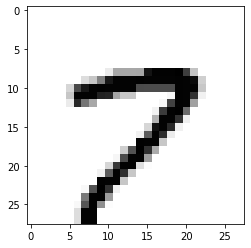

In [10]:
# extract the first image in x_train
idx = 123
img = x_train[idx, :, :] # : means that we include all indices
print("Shape of the image:", img.shape)
plt.imshow(img, cmap="Greys")

In [8]:
print("Shape of y_train:", y_train.shape)
y_train[idx]

Shape of y_train: (60000,)


5

Now let's build a neural network model.

In [9]:
# Build a neural network model by stacking layers.
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # convert a 28*28 matrix into a 784 1D array
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")                                   
])

- The first line creates a `Sequential` model. This is the simplest kind of Keras
model, for neural networks that are just composed of a single stack of layers, connected sequentially. This is called the sequential API.
-Next, we build the first layer and add it to the model. It is a Flatten layer whose
role is simply to convert each input image into a 1D array
- Next we add a Dense hidden layer with 128 neurons. It will use the ReLU activation function.
- Next we add a second Dense hidden layer with 128 neurons, also using the ReLU
activation function.
- Finally, we add a Dense output layer with 10 neurons (one per class), using `softmax` activation function.


In [33]:
# For each example the model returns a vector of "logits", one for each class.
index = 1234
probs = model(x_train[index:index+2]) # The input to this model should be an array of images. It should be a 3D array.
print(probs)

tf.Tensor(
[[0.08  0.116 0.087 0.066 0.153 0.134 0.107 0.071 0.051 0.135]
 [0.106 0.09  0.08  0.066 0.132 0.139 0.093 0.078 0.062 0.155]], shape=(2, 10), dtype=float32)


In [34]:
# We should make sure that the input is a 3D array.
# x_train[index].shape              # Shape: (28, 28) X
# x_train[index:index+1].shape      # Shape: (1, 28, 28) V
# temp = np.array([x_train[index]]) # Shape: (1, 28, 28) V

In [35]:
# probs represents a probability distribution
print(np.sum(probs))

2.0


In [17]:
# The model makes prediction based on the largest probability
class_prediction = np.argmax(probs)
print(class_prediction)

4


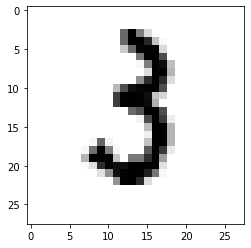

In [18]:
# Visualize this image
plt.imshow(x_train[index].reshape([28, 28]), cmap=plt.cm.binary)

The prediction accuracy is low, since no training has been performed yet. Let's introduce a function that measures the prediction error.

In [36]:
# Let's introduce a function that measures the prediction error.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
loss_fn(y_train[index:(index+2)], probs).numpy()

2.2931986

In [41]:
# The cross-entropy loss is 0 if the output distribution is the same as the ground truth label
correct_label = y_train[index]
correct_probability_distribution = np.array([0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0])
loss_fn(correct_label, correct_probability_distribution).numpy()

very_wrong_distribution = np.array([0.5, 0.3, 0.2, 0, 0, 0, 0, 0, 0, 0])
loss_fn(correct_label, very_wrong_distribution).numpy()

16.118096350958076

In [42]:
# Set up the training environment
model.compile(optimizer='sgd',
              loss=loss_fn,
              metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Understand the number of parameters
# The first dense layer has 784 * 128 connections with the input layer
print("First dense layer:")
print("# of weight parameters:", 784 * 128)
print("# of bias parameters:", 128)
print("Total:", 784 * 128 + 128)

print('=' * 30)
print("Second dense layer:")
print("# of weight parameters:", 128 * 128)
print("# of bias parameters:", 128)
print("Total:", 128 * 128 + 128)

print('=' * 30)
print("Third dense layer:")
print("# of weight parameters:", 128 * 10)
print("# of bias parameters:", 10)
print("Total:", 128 * 10 + 10)

First dense layer:
# of weight parameters: 100352
# of bias parameters: 128
Total: 100480
Second dense layer:
# of weight parameters: 16384
# of bias parameters: 128
Total: 16512
Third dense layer:
# of weight parameters: 1280
# of bias parameters: 10
Total: 1290


In [53]:
# The Model.fit method adjusts the model parameters to minimize the loss
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1660 - accuracy: 0.9527
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1501 - accuracy: 0.9566
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1366 - accuracy: 0.9610
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1252 - accuracy: 0.9645
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1151 - accuracy: 0.9671
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1070 - accuracy: 0.9695
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0991 - accuracy: 0.9719
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0924 - accuracy: 0.9740
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0866 - accuracy: 0.9754
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.081

The `fit()` method returns a `History` object containing
- the training parameters (`history.params`), 
- the list of epochs it went through (`history.epoch`), 
- a dictionary (`history.history`) containing the loss and extra metrics it
measured at the end of each epoch on the training set and on the validation set

In [49]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 1875}

In [50]:
history.epoch

[0, 1, 2, 3, 4]

In [51]:
history.history

{'loss': [0.6348854303359985,
  0.296861857175827,
  0.24601028859615326,
  0.2122013419866562,
  0.18605060875415802],
 'accuracy': [0.8327666521072388,
  0.9139999747276306,
  0.929183304309845,
  0.9388499855995178,
  0.9470999836921692]}

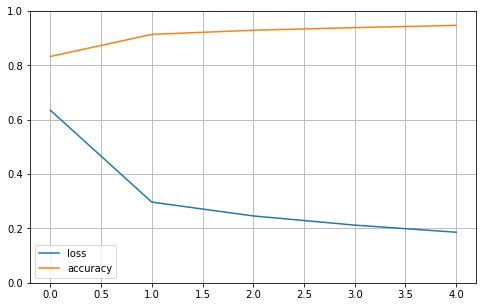

In [52]:
# Visualize the training process
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim([0, 1]) # set the vertical range to [0-1]
plt.show()

In [54]:
# The above loss and accuracy is for the training data. Let's evaluate the model on the test set.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0971 - accuracy: 0.9703


[0.09708760678768158, 0.970300018787384]

In [ ]:
# Show the confusion matrix
from sklearn.metrics import confusion_matrix
predictions = model.predict(x_test)
classes = np.argmax(predictions, axis=1)
mat = confusion_matrix(y_test, classes)
print(mat)

The image classifier is now trained to ~98% accuracy on this dataset. Let's create a test case ourselves. For example, we can use MS Paint to draw a digit. Remember to resize the canvas to 28*28 pixels

Upload the image to Colab environment by clicking the "Upload to Session Storage" button in the File tab on the left.

In [ ]:
# import pillow for image transformation
import PIL
img = PIL.Image.open("Test.png")
img = img.convert('1') # convert image to black and white
print(img.size)

In [ ]:
# Convert the image to the proper format


In [ ]:
# Obtain predictions from the model


In [ ]:
# y_test_pred = np.argmax(model(x_test).numpy())
y_test_pred = []
raw_predictions = model(x_test).numpy()
for row_idx in range(raw_predictions.shape[0]):
    logits = raw_predictions[row_idx, :]
    probs = tf.nn.softmax(logits).numpy()
    class_pred = np.argmax(probs)
    y_test_pred.append(class_pred)
print(y_test_pred)

In [ ]:
# Save a model
model.save("my_keras_model.h5")

In [ ]:
# Restore a model
model = tf.keras.models.load_model("my_keras_model.h5")

# Exercise 1: Are larger models better?
Modify the neural network model in one of the following ways:
1. Increate the number of neurons from 128 to 256.
2. Add another layer of 128 nodes.
Report the accuracy and the confusion matrix on the test set.



**In which ways can one modify a neural network model?**

## Exercise 2: Train a Neural Network That Learns the XOR Operation